# Exercise 5 : Classification Tree

## Preparation

In [1]:
# import essential libs
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1

Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')
Use the following variables from the dataset in this problem : SalePrice and CentralAir

In [2]:
houseData = pd.read_csv('./train.csv')

centralAirDf = pd.DataFrame(houseData['CentralAir']) # Response
salePriceDf = pd.DataFrame(houseData['SalePrice']) # Predictor



### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

In [3]:
centralAirDf["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

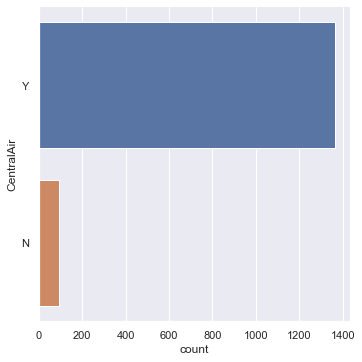

In [4]:
sb.catplot(y = "CentralAir", data = centralAirDf, kind = "count")

### b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

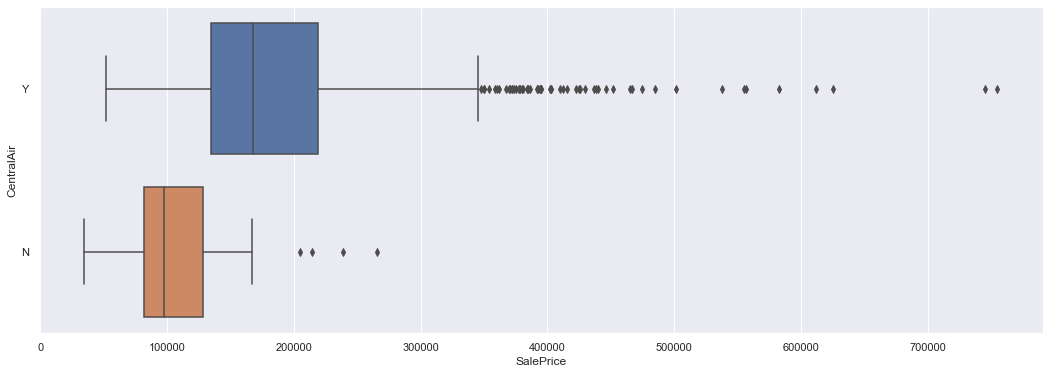

In [5]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([salePriceDf, centralAirDf], axis = 1).reindex(salePriceDf.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")



### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [6]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [7]:
salePrice_train, salePrice_test, centralAir_train, centralAir_test = train_test_split(salePriceDf, centralAirDf, test_size = 0.246)

print("Train Data Size:", salePrice_train.shape, centralAir_train.shape)
print("Test Data Size:", salePrice_test.shape, centralAir_test.shape)

Train Data Size: (1100, 1) (1100, 1)
Test Data Size: (360, 1) (360, 1)


### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

In [12]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

dectree.fit(salePrice_train, centralAir_train)

DecisionTreeClassifier(max_depth=2)

### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'SalePrice <= 98150.0\ngini = 0.111\nsamples = 1100\nvalue = [65, 1035]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 61691.5\ngini = 0.495\nsamples = 82\nvalue = [37, 45]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 136700.0\ngini = 0.053\nsamples = 1018\nvalue = [28, 990]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.137\nsamples = 256\nvalue = [19, 237]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.023\nsamples = 762\nvalue = [9, 753]\nclass = Y')]

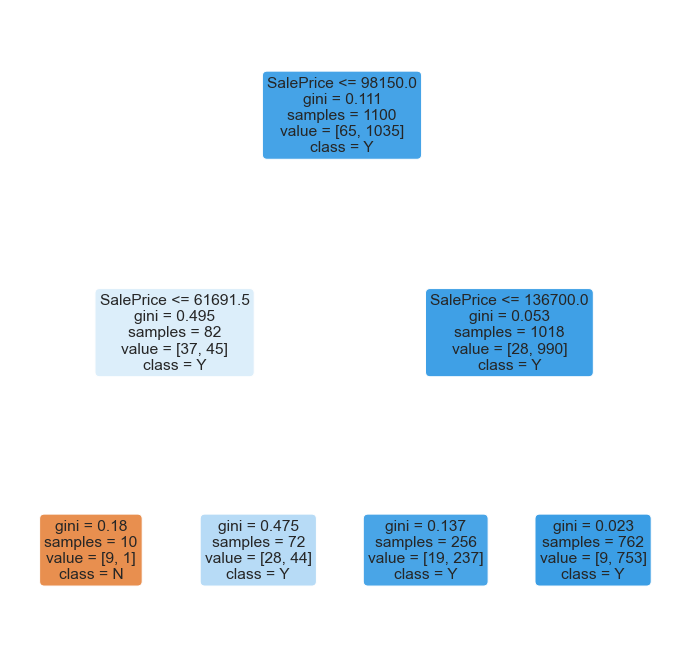

In [13]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

# Using class names as given in part (e): "Y"/"N"
# Where N means no central air, and Y means it has central air

### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

In [17]:
# Predicting
centralAir_train_pred = dectree.predict(salePrice_train)

<AxesSubplot:>

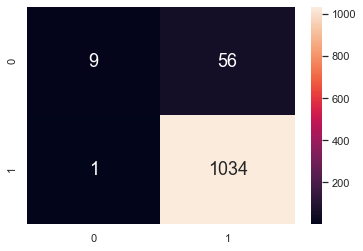

In [18]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centralAir_train, centralAir_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [23]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePrice_train, centralAir_train))

print("True Positive rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[0][0])
print("True Negative rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[0][1])
print("False Positive rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[1][0])
print("False Negative rate \t\t:", confusion_matrix(centralAir_train, centralAir_train_pred)[1][1])


Classification Accuracy 	: 0.9481818181818182
True Positive rate 		: 9
True Negative rate 		: 56
False Positive rate 		: 1
False Negative rate 		: 1034


### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

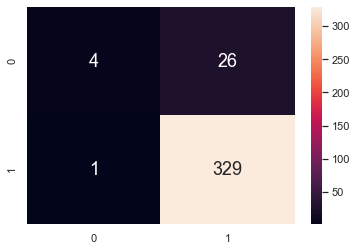

In [21]:
# Predicting
centralAir_test_pred = dectree.predict(salePrice_test)

# Confusion Matrix
sb.heatmap(confusion_matrix(centralAir_test, centralAir_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [24]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(salePrice_test, centralAir_test))

print("True Positive rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[0][0])
print("True Negative rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[0][1])
print("False Positive rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[1][0])
print("False Negative rate \t\t:", confusion_matrix(centralAir_test, centralAir_test_pred)[1][1])


Classification Accuracy 	: 0.925
True Positive rate 		: 4
True Negative rate 		: 26
False Positive rate 		: 1
False Negative rate 		: 329
